In [4]:
%matplotlib inline

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import make_scorer, f1_score, accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.cluster import KMeans

In [6]:
pip install scikit-plot

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [10]:
import scikitplot as skplt

In [11]:
obesity_data = pd.read_csv("D:\Data Analysis\Datasets\BMIAnalysis.csv")

In [12]:
obesity_data.head()

,Age,Gender,Weight_Kilograms,Height_InCentimetres,BMICalculation,ObesityLevel,PregnantOrBreastfeedingOrTryingToGetPregnant,Lack_of_exercise,Smoke,Drink_alcohol
0,18,Female,53.070264,165.10,19.47,Normal,0.0,0,1,1
1,18,Female,58.966960,160.02,23.03,Normal,0.0,1,0,0
2,18,Female,66.224432,162.56,25.06,Overweight,0.0,1,1,0
3,18,Female,68.492392,167.60,25.10,Overweight,0.0,1,0,0
4,18,Female,69.853168,154.94,29.10,Overweight,0.0,1,0,0


In [13]:
obesity_data.shape

(18106, 10)

In [14]:
obesity_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18106 entries, 0 to 18105
Data columns (total 10 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Age                                           18106 non-null  int64  
 1   Gender                                        18106 non-null  object 
 2   Weight_Kilograms                              18106 non-null  float64
 3   Height_InCentimetres                          18106 non-null  float64
 4   BMICalculation                                18106 non-null  float64
 5   ObesityLevel                                  18106 non-null  object 
 6   PregnantOrBreastfeedingOrTryingToGetPregnant  16442 non-null  float64
 7   Lack_of_exercise                              18106 non-null  int64  
 8   Smoke                                         18106 non-null  int64  
 9   Drink_alcohol                                 18106 non-null 

In [15]:
obesity_data

,Age,Gender,Weight_Kilograms,Height_InCentimetres,BMICalculation,ObesityLevel,PregnantOrBreastfeedingOrTryingToGetPregnant,Lack_of_exercise,Smoke,Drink_alcohol
0,18,Female,53.070264,165.10,19.47,Normal,0.0,0,1,1
1,18,Female,58.966960,160.02,23.03,Normal,0.0,1,0,0
2,18,Female,66.224432,162.56,25.06,Overweight,0.0,1,1,0
3,18,Female,68.492392,167.60,25.10,Overweight,0.0,1,0,0
4,18,Female,69.853168,154.94,29.10,Overweight,0.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
18101,181978,Female,79.400000,164.60,29.31,None,1.0,1,0,0
18102,281182,Female,101.604608,170.18,35.08,Obesity II,0.0,0,1,1
18103,7061975,Female,69.853168,147.32,31.60,Obesity I,0.0,0,0,1
18104,24061961,Male,123.377024,180.34,37.94,Obesity II,NaN,1,0,1


In [16]:
for index, row in obesity_data.iterrows():
    days = row['BMICalculation']
    val = ''
    if days < 18.5:
        val = 'Underweight'
    elif 24.9 > days >  18.5:
        val = 'Normal'
    elif 29.9 > days > 25.0:
        val = 'Overweight'
    elif  34.9 > days > 30:
        val = 'Obesity I'
    elif  39.9 > days > 35:
        val = 'Obesity II'
    elif days >= 40:
        val = 'Obesity III'

    obesity_data.at[index, 'NewObesityLevel'] = val

print(obesity_data)

            Age  Gender  Weight_Kilograms  Height_InCentimetres  \
0            18  Female         53.070264                165.10   
1            18  Female         58.966960                160.02   
2            18  Female         66.224432                162.56   
3            18  Female         68.492392                167.60   
4            18  Female         69.853168                154.94   
...         ...     ...               ...                   ...   
18101    181978  Female         79.400000                164.60   
18102    281182  Female        101.604608                170.18   
18103   7061975  Female         69.853168                147.32   
18104  24061961    Male        123.377024                180.34   
18105  29091966  Female         74.842680                157.48   

       BMICalculation ObesityLevel  \
0               19.47       Normal   
1               23.03       Normal   
2               25.06   Overweight   
3               25.10   Overweight   
4    

In [17]:
obesity_data

,Age,Gender,Weight_Kilograms,Height_InCentimetres,BMICalculation,ObesityLevel,PregnantOrBreastfeedingOrTryingToGetPregnant,Lack_of_exercise,Smoke,Drink_alcohol,NewObesityLevel
0,18,Female,53.070264,165.10,19.47,Normal,0.0,0,1,1,Normal
1,18,Female,58.966960,160.02,23.03,Normal,0.0,1,0,0,Normal
2,18,Female,66.224432,162.56,25.06,Overweight,0.0,1,1,0,Overweight
3,18,Female,68.492392,167.60,25.10,Overweight,0.0,1,0,0,Overweight
4,18,Female,69.853168,154.94,29.10,Overweight,0.0,1,0,0,Overweight
...,...,...,...,...,...,...,...,...,...,...,...
18101,181978,Female,79.400000,164.60,29.31,None,1.0,1,0,0,Overweight
18102,281182,Female,101.604608,170.18,35.08,Obesity II,0.0,0,1,1,Obesity II
18103,7061975,Female,69.853168,147.32,31.60,Obesity I,0.0,0,0,1,Obesity I
18104,24061961,Male,123.377024,180.34,37.94,Obesity II,NaN,1,0,1,Obesity II


In [12]:
def count_values(dataset, cat_variable, order = None):
    """
    Function: Counts values in each category and displays them on a plot.
    
    Parameters: Dataset, category feature, and order of appearance (order is optional).
    """
    ax = sns.countplot(x = cat_variable, data = dataset, palette = "Blues_r", order = order)
    for p in ax.patches:
        ax.annotate(f"\n{p.get_height()}", (p.get_x()+0.2, p.get_height()), 
                    ha = "center", va = "top", color = "white", size = 10)
    
    plt.title(f"Number of items in each {cat_variable} category")
    plt.show()

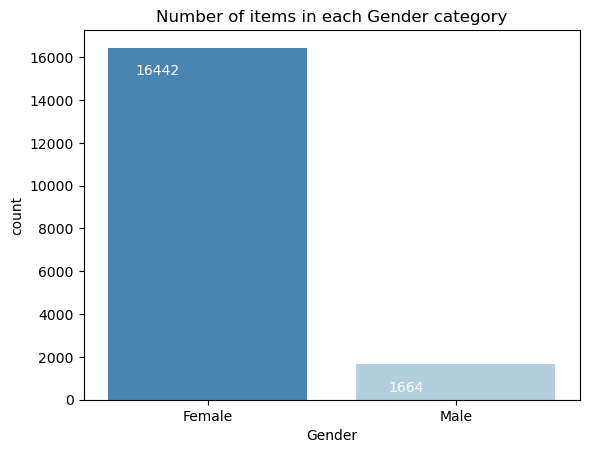

In [13]:
count_values(obesity_data, "Gender")

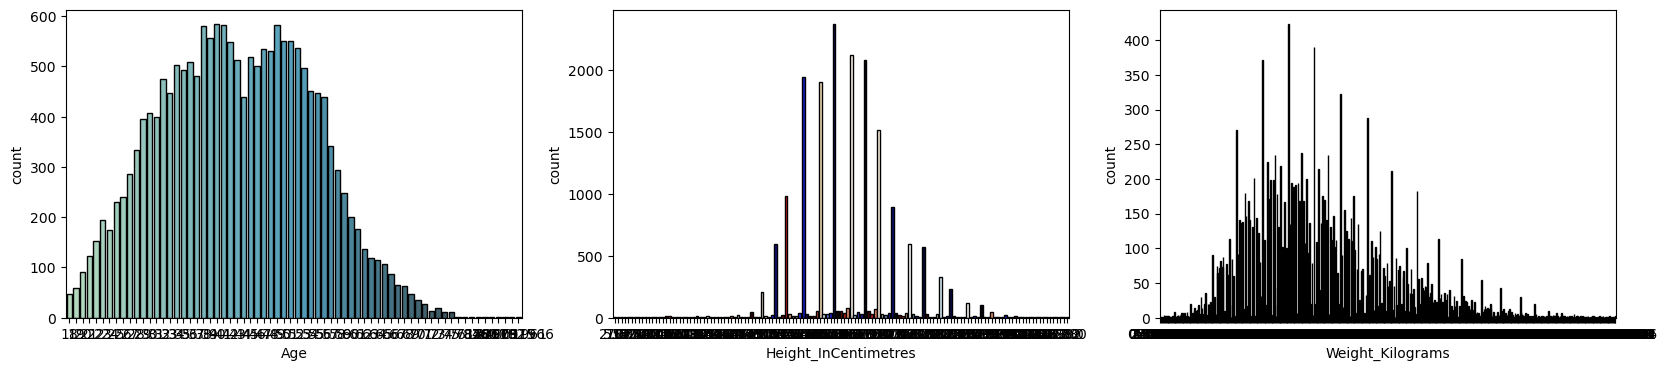

In [19]:
plt.figure(figsize=(20,4))
plt.subplot(131)
sns.countplot(x= 'Age', data = obesity_data, palette="GnBu_d",edgecolor="black")
plt.subplot(132)
sns.countplot(x= 'Height_InCentimetres', data = obesity_data, palette="flag",edgecolor="black")
plt.subplot(133)
sns.countplot(x= 'Weight_Kilograms', data = obesity_data, palette="Greens_r",edgecolor="black")
plt.show()

In [20]:
#Codes from Gabriel Preda

def plot_count(feature, title, df, size=1):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


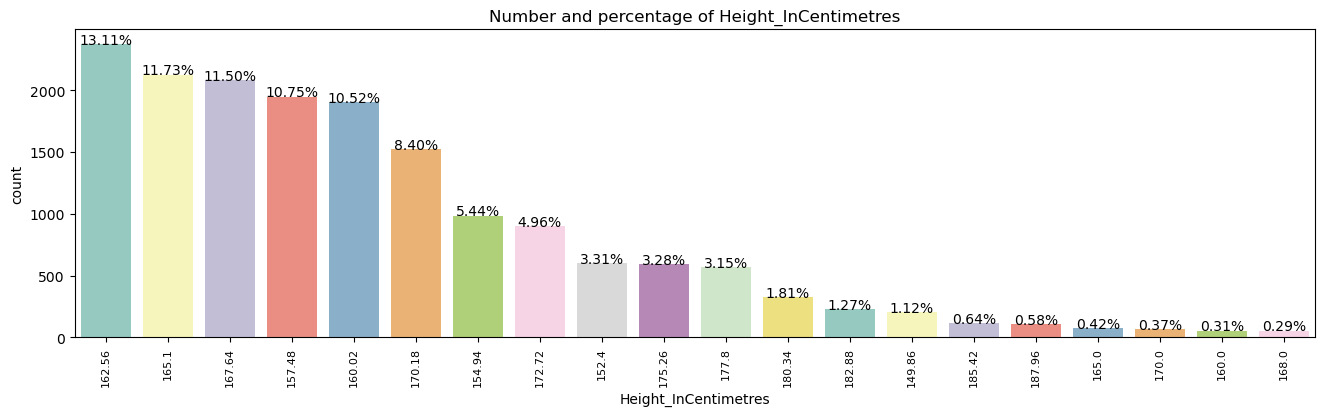

In [22]:
plot_count("Height_InCentimetres", "Height_InCentimetres", obesity_data,4)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


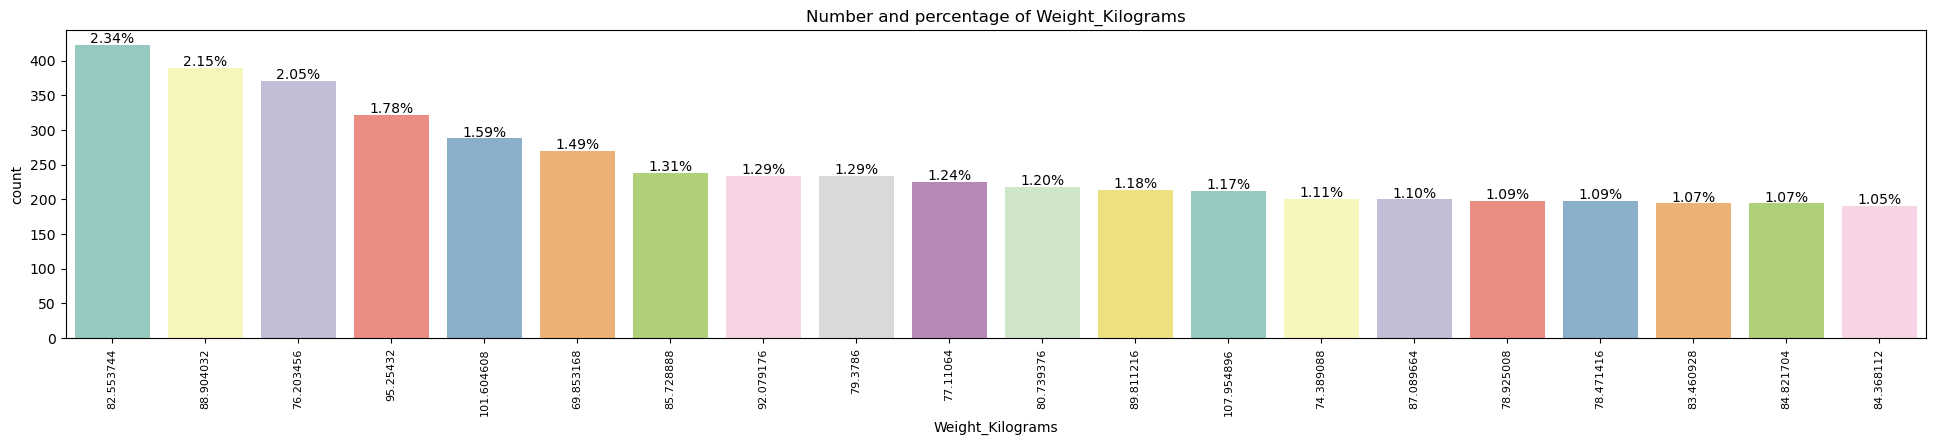

In [25]:
plot_count("Weight_Kilograms", "Weight_Kilograms", obesity_data, 6)

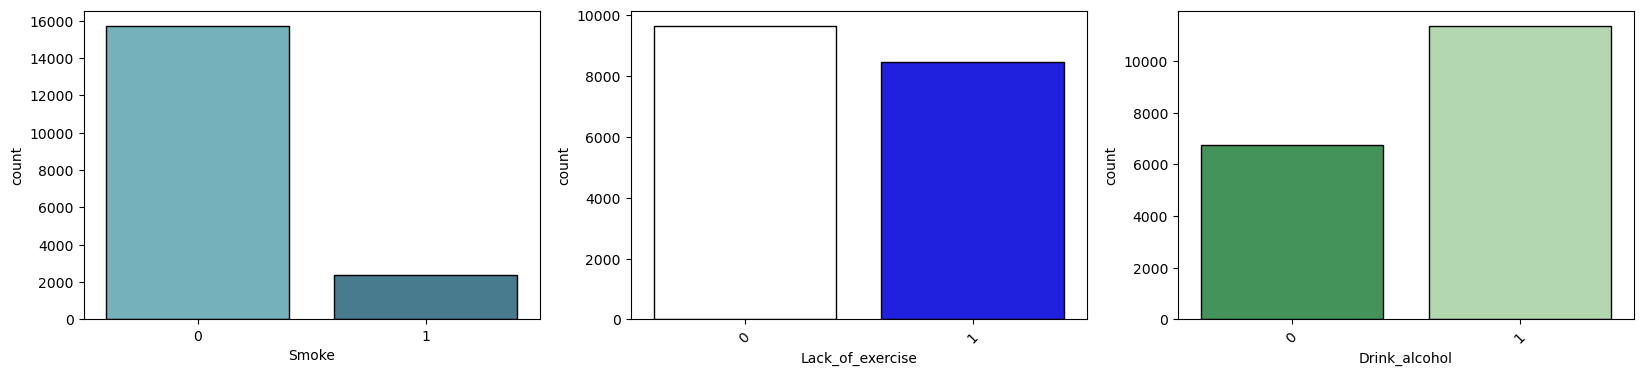

In [26]:
plt.figure(figsize=(20,4))
plt.subplot(131)
sns.countplot(x= 'Smoke', data = obesity_data, palette="GnBu_d",edgecolor="black")
plt.subplot(132)
sns.countplot(x= 'Lack_of_exercise', data = obesity_data, palette="flag",edgecolor="black")
plt.xticks(rotation=45)
plt.subplot(133)
sns.countplot(x= 'Drink_alcohol', data = obesity_data, palette="Greens_r",edgecolor="black")
plt.xticks(rotation=45)
plt.show()

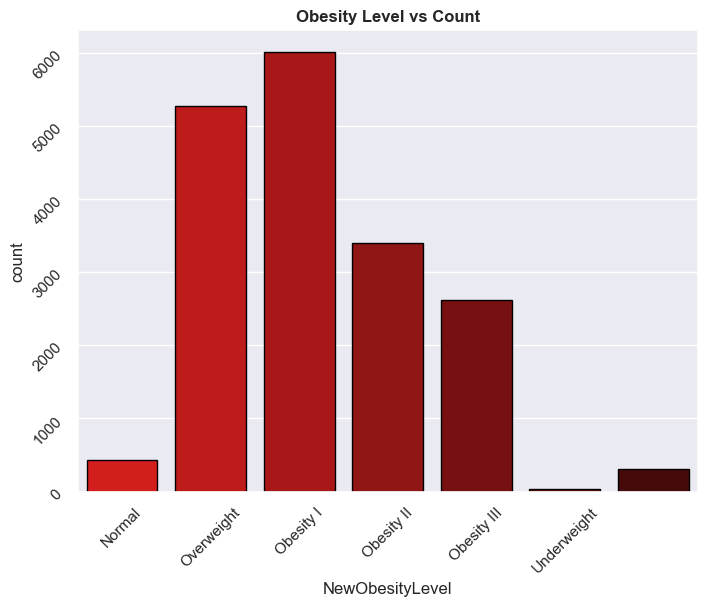

In [31]:
#Obesity Level segregation and It's count
#1 Underweight if BMI < 18.5
#2 Normal if BMI 18.5 - 24.9
#3 Overweight if BMI 25.0 - 29.9
#4 Obesity I if BMI 30.0 - 34.9
#5 Obesity II if BMI 35.0 to 39.9
#6 Obesity III if BMI > 40

plt.figure(figsize=(8,6))
sns.countplot(x="NewObesityLevel",data=obesity_data,palette="flag",edgecolor="black")
plt.title('Obesity Level vs Count', weight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
# changing the font size
sns.set(font_scale=1)
plt.savefig('ObesityLevel.png', bbox_inches='tight', pad_inches=0.0)

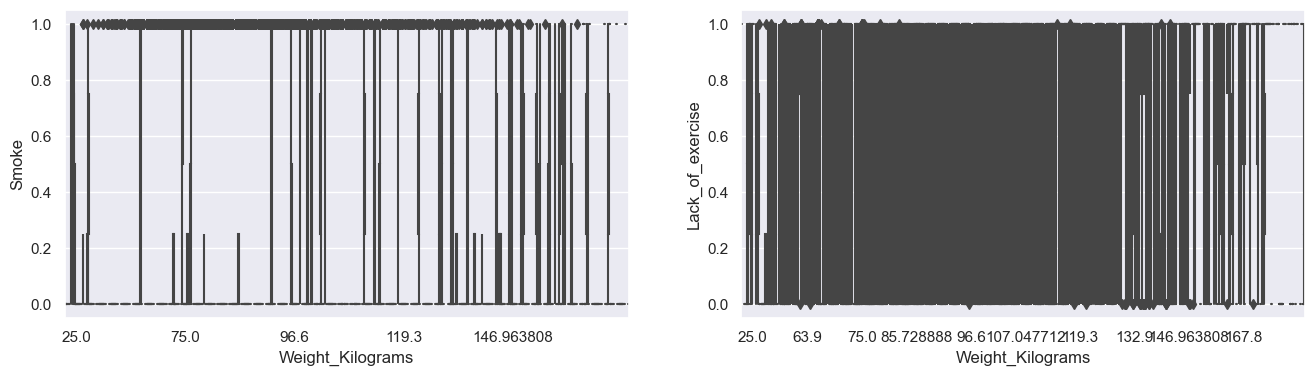

In [60]:
#Univariate analysis

plt.figure(figsize=(16, 4))
plt.title('Weight vs Causing Factors', weight='bold')
plt.subplot(121)
sns.boxplot(x = 'Weight_Kilograms', y = 'Smoke', data = obesity_data)
plt.xticks(np.arange(10, 500, 100.0))
plt.subplot(122)
sns.boxplot(x = 'Weight_Kilograms', y = 'Lack_of_exercise', data = obesity_data)
plt.xticks(np.arange(10, 500, 50.0))
plt.show()

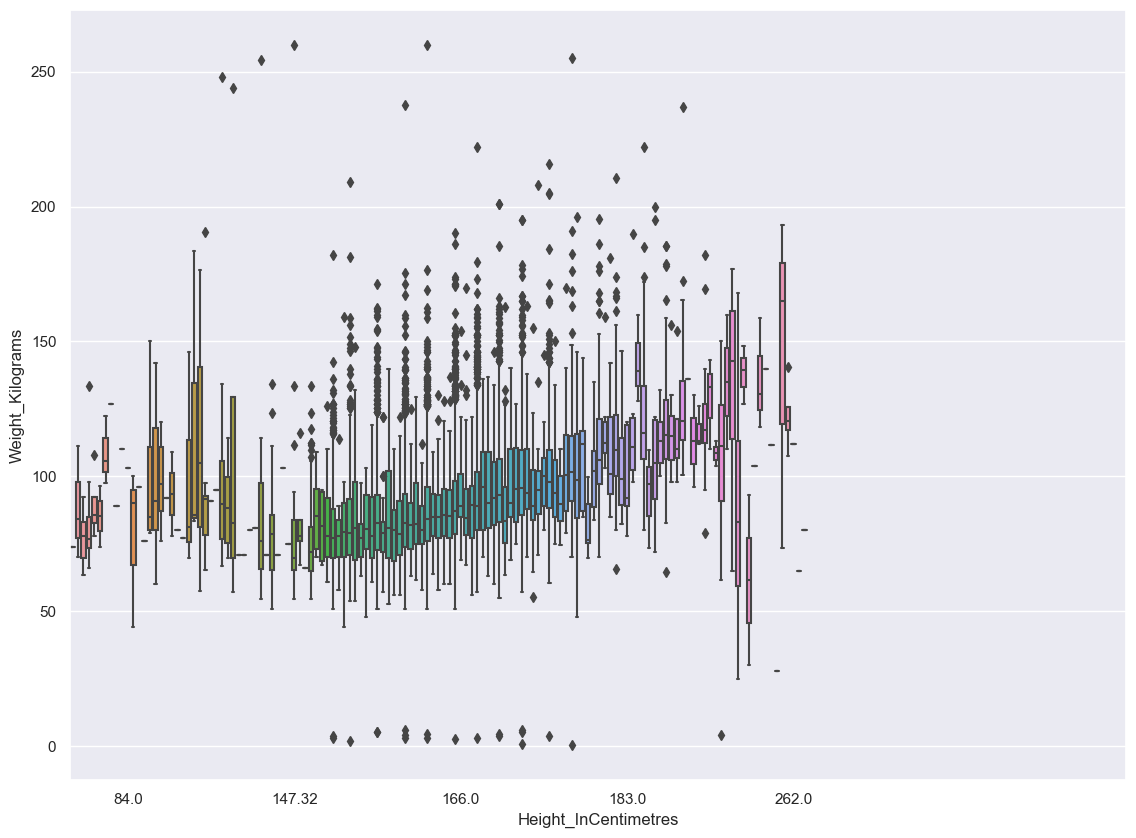

In [58]:
# Bivariate analysis
#concurrent debth relation between Hieght and Weight

plt.figure(figsize=(30, 10))
plt.subplot(121)
sns.boxplot(x = 'Height_InCentimetres', y = 'Weight_Kilograms', data = obesity_data)
plt.xticks(np.arange(10, 200, 30.0))
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


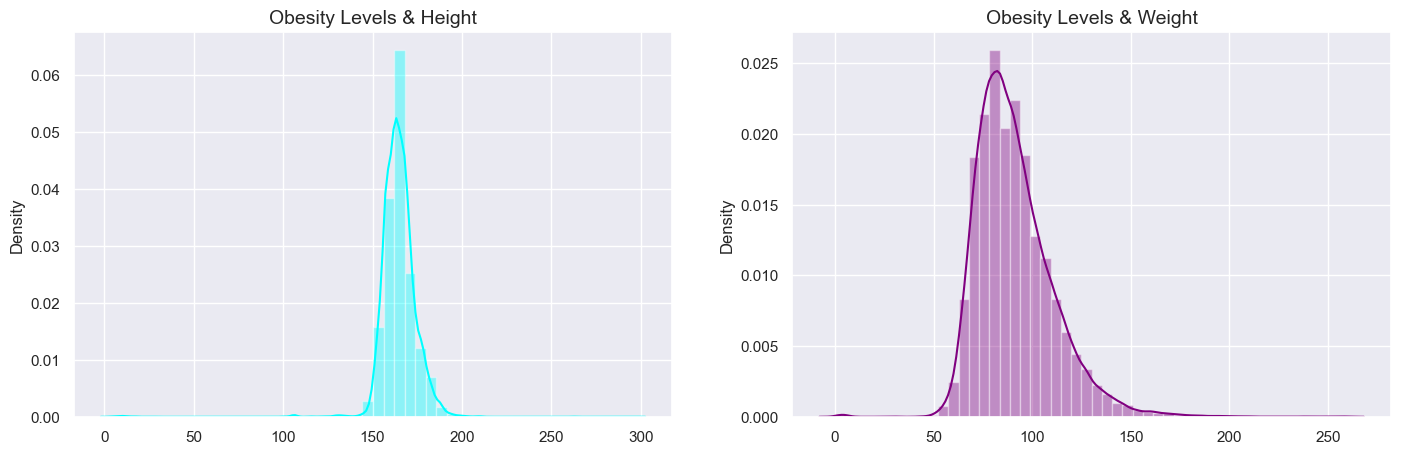

In [66]:
# Distribution of different facts
# Obesity Levels vs Height
# Obesity Levels vs Weight

fig , ax = plt.subplots(1,2,figsize = (17,5))

Height= obesity_data.Height_InCentimetres.values
Weight = obesity_data.Weight_Kilograms.values

sns.distplot(Height , ax = ax[0] , color = 'cyan').set_title('Obesity Levels & Height' , fontsize = 14)
sns.distplot(Weight , ax = ax[1] , color = 'purple').set_title('Obesity Levels & Weight' , fontsize = 14)

plt.show()

In [70]:
for index, row in obesity_data.iterrows():
    gender = row['Gender']
    val = 0
    if gender == 'Female':
        val = 1    
    elif gender == 'Male':
        val = 0

    obesity_data.at[index, 'GenderCategory'] = val

print(obesity_data)

            Age  Gender  Weight_Kilograms  Height_InCentimetres  \
0            18  Female         53.070264                165.10   
1            18  Female         58.966960                160.02   
2            18  Female         66.224432                162.56   
3            18  Female         68.492392                167.60   
4            18  Female         69.853168                154.94   
...         ...     ...               ...                   ...   
18101    181978  Female         79.400000                164.60   
18102    281182  Female        101.604608                170.18   
18103   7061975  Female         69.853168                147.32   
18104  24061961    Male        123.377024                180.34   
18105  29091966  Female         74.842680                157.48   

       BMICalculation ObesityLevel  \
0               19.47       Normal   
1               23.03       Normal   
2               25.06   Overweight   
3               25.10   Overweight   
4    

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


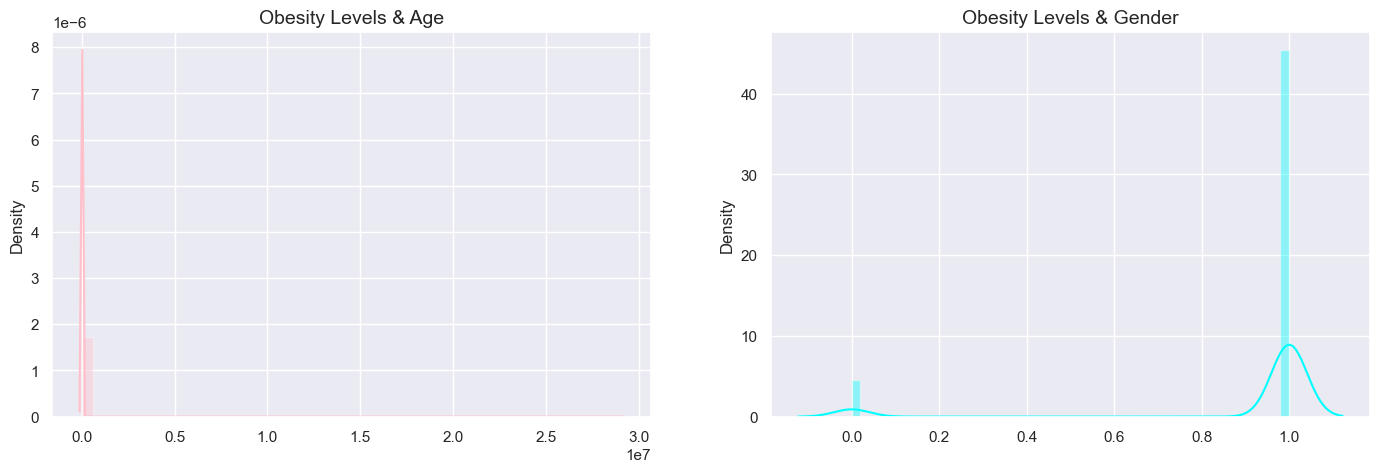

In [71]:
# Distribution of different facts
# Obesity Levels vs Age
# Obesity Levels vs Gender

fig , ax = plt.subplots(1,2,figsize = (17,5))

Age = obesity_data.Age.values
Gender= obesity_data.GenderCategory.values

sns.distplot(Age , ax = ax[0] , color = 'pink').set_title('Obesity Levels & Age' , fontsize = 14)
sns.distplot(Gender , ax = ax[1] , color = 'cyan').set_title('Obesity Levels & Gender' , fontsize = 14)

plt.show()

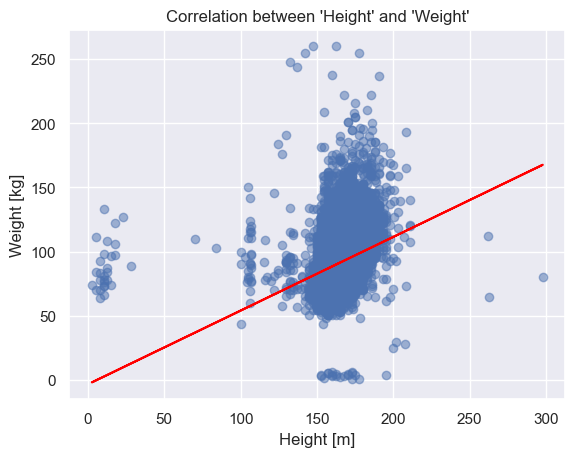

In [72]:
plt.scatter(obesity_data["Height_InCentimetres"], obesity_data["Weight_Kilograms"], alpha = 0.5)
m, b = np.polyfit(obesity_data["Height_InCentimetres"], obesity_data["Weight_Kilograms"], 1)
plt.plot(obesity_data["Height_InCentimetres"], m * obesity_data["Height_InCentimetres"] + b, color = "red")

plt.xlabel("Height [m]")
plt.ylabel("Weight [kg]")
plt.title("Correlation between 'Height' and 'Weight'")
plt.show()

In [74]:
def count_values(dataset, cat_variable, order = None):
    """
    Function: Counts values in each category and displays them on a plot.    
    Parameters: Dataset, category feature, and order of appearance (order is optional).
    """
    ax = sns.countplot(x = cat_variable, data = dataset, palette = "Blues_r", order = order)
    for p in ax.patches:
        ax.annotate(f"\n{p.get_height()}", (p.get_x()+0.2, p.get_height()), 
                    ha = "center", va = "top", color = "white", size = 10)
    
    plt.title(f"Number of items in each {cat_variable} category")
    plt.show()

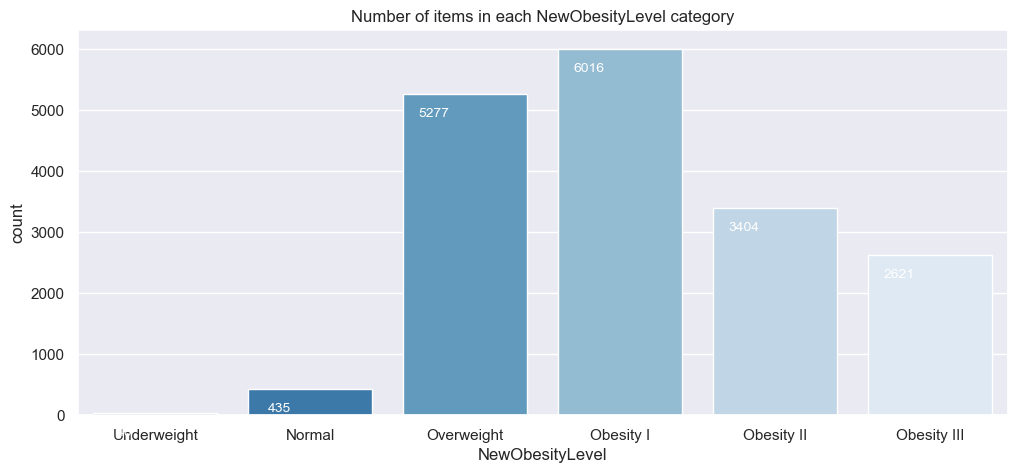

In [75]:
#Obesity Level segregation and It's count
#1 Underweight if BMI < 18.5
#2 Normal if BMI 18.5 - 24.9
#3 Overweight if BMI 25.0 - 29.9
#4 Obesity I if BMI 30.0 - 34.9
#5 Obesity II if BMI 35.0 to 39.9
#6 Obesity III if BMI > 40

plt.figure(figsize = (12, 5))
count_values(obesity_data, "NewObesityLevel", ["Underweight", "Normal",
        "Overweight", "Obesity I", "Obesity II", "Obesity III"]) 

<AxesSubplot:>

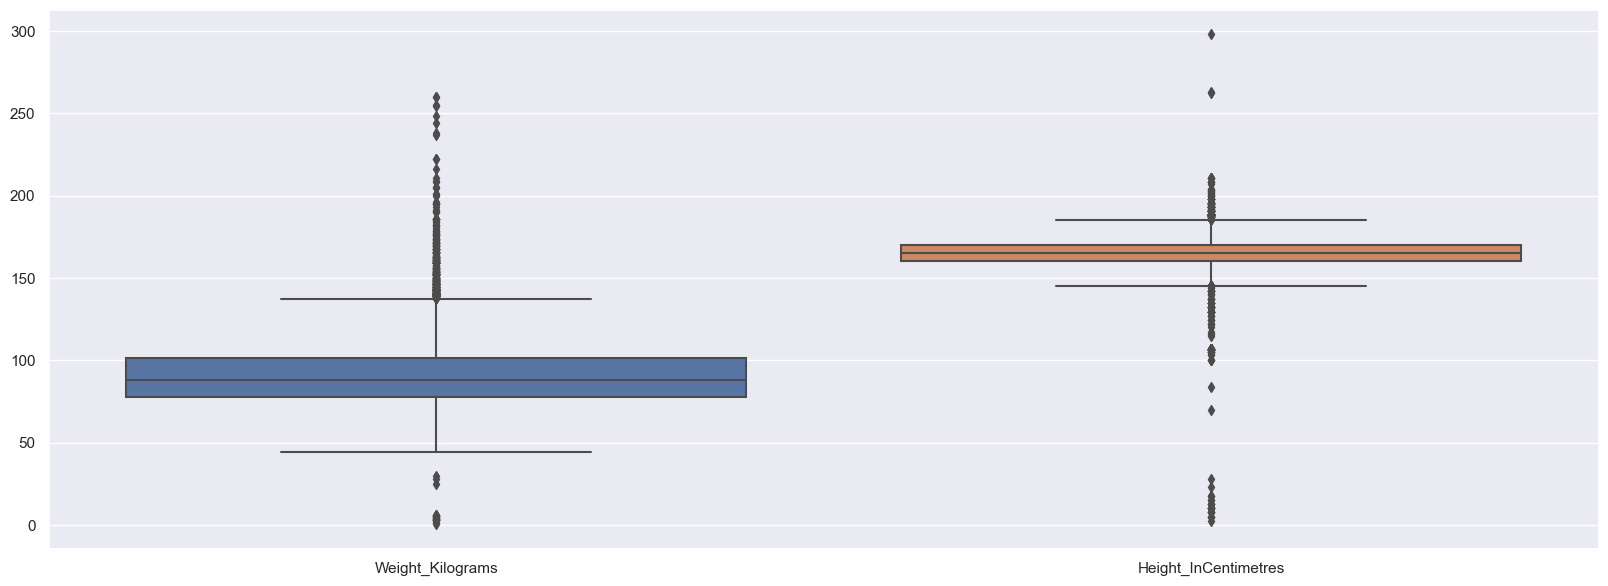

In [76]:
#Checking the Ranges of the predictor variables and dependent variable after normalizing[3]
plt.figure(figsize=(20,7))
sns.boxplot(data=obesity_data.iloc[:, 1:4])

In [ ]:
 df = pd.DataFrame(obesity_data)

print('DataFrame:\n', df)

# default CSV
csv_data = df.to_csv()
print('\nCSV String:\n', csv_data)